In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler

In [2]:
pd.set_option('max_rows',None)
pd.set_option('max_columns',None)

In [3]:
df=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19802 entries, 0 to 19801
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            19802 non-null  int64 
 1   experience            19802 non-null  object
 2   job_description       15384 non-null  object
 3   job_desig             19802 non-null  object
 4   job_type              4797 non-null   object
 5   key_skills            19801 non-null  object
 6   location              19802 non-null  object
 7   salary                19802 non-null  object
 8   company_name_encoded  19802 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 1.4+ MB


In [5]:
df.drop(['Unnamed: 0','job_description','job_desig','job_type'], axis=1, inplace=True)

In [6]:
df.dropna(inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19801 entries, 0 to 19801
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   experience            19801 non-null  object
 1   key_skills            19801 non-null  object
 2   location              19801 non-null  object
 3   salary                19801 non-null  object
 4   company_name_encoded  19801 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 928.2+ KB


In [8]:
exp = df['experience'].str.split(" ", n = 1, expand = True)
exp.head()

,0,1
0,5-7,yrs
1,10-17,yrs
2,5-9,yrs
3,7-10,yrs
4,1-3,yrs


In [9]:
exp1 = exp[0].str.split("-", n = 1, expand = True)
exp1.head()

,0,1
0,5,7
1,10,17
2,5,9
3,7,10
4,1,3


In [10]:
df['min_exp'] = exp1[0]
df['max_exp'] = exp1[1]

In [11]:
df['min_exp'] = df['min_exp'].astype('int')
df['max_exp'] = df['max_exp'].astype('int')

In [12]:
df.drop(['experience'],axis=1, inplace=True)

In [13]:
df['salary'].value_counts()

10to15    4500
15to25    4125
6to10     3532
0to3      3245
3to6      2824
25to50    1575
Name: salary, dtype: int64

In [14]:
df.replace(to_replace=['10to15'],value=0,inplace=True)
df.replace(to_replace=['15to25'],value=1,inplace=True)
df.replace(to_replace=['6to10'],value=2,inplace=True)
df.replace(to_replace=['0to3'],value=3,inplace=True)
df.replace(to_replace=['3to6'],value=4,inplace=True)
df.replace(to_replace=['25to50'],value=5,inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19801 entries, 0 to 19801
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   key_skills            19801 non-null  object
 1   location              19801 non-null  object
 2   salary                19801 non-null  int64 
 3   company_name_encoded  19801 non-null  int64 
 4   min_exp               19801 non-null  int32 
 5   max_exp               19801 non-null  int32 
dtypes: int32(2), int64(2), object(2)
memory usage: 928.2+ KB


In [16]:
location_le = LabelEncoder()

In [17]:
loc = location_le.fit_transform(df['location'].values)

In [18]:
loc

array([ 597, 1412,  525, ...,  863, 1301,  863])

In [19]:
df['loc'] = pd.DataFrame(loc, columns=['loc']) 

In [20]:
skills_le = LabelEncoder()

In [21]:
skills = skills_le.fit_transform(df['key_skills'].values)

In [22]:
skills

array([12700, 11458,  3459, ...,  7119,  8562,  3795])

In [23]:
df['skills'] = pd.DataFrame(skills, columns=['skills'])

In [24]:
df.head()

,key_skills,location,salary,company_name_encoded,min_exp,max_exp,loc,skills
0,"team skills, communication skills, analytical ...",Delhi NCR(Vikas Puri),2,3687,5,7,597.0,12700.0
1,"ppc, logistics, inventory management, supply c...",Sonepat,0,458,10,17,1412.0,11458.0
2,"HR Analytics, Employee Engagement, Training, S...",Delhi NCR,1,4195,5,9,525.0,3459.0
3,"SQL, Javascript, Automation, Python, Ruby, Ana...",Bengaluru,0,313,7,10,114.0,7226.0
4,"accounting, finance, cash flow, financial plan...",Gurgaon,4,1305,1,3,811.0,8541.0


In [25]:
df.drop(['key_skills','location'], axis=1, inplace=True)

In [26]:
df.dropna(inplace=True)

In [27]:
df['loc'] = df['loc'].astype('int')
df['skills'] = df['skills'].astype('int')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19800 entries, 0 to 19800
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   salary                19800 non-null  int64
 1   company_name_encoded  19800 non-null  int64
 2   min_exp               19800 non-null  int32
 3   max_exp               19800 non-null  int32
 4   loc                   19800 non-null  int32
 5   skills                19800 non-null  int32
dtypes: int32(4), int64(2)
memory usage: 773.4 KB


In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6601 entries, 0 to 6600
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   experience            6601 non-null   object
 1   job_description       5079 non-null   object
 2   job_desig             6601 non-null   object
 3   job_type              1637 non-null   object
 4   key_skills            6601 non-null   object
 5   location              6601 non-null   object
 6   company_name_encoded  6601 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 361.1+ KB


In [30]:
test.drop(['job_description','job_desig','job_type'], axis=1, inplace=True)

In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6601 entries, 0 to 6600
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   experience            6601 non-null   object
 1   key_skills            6601 non-null   object
 2   location              6601 non-null   object
 3   company_name_encoded  6601 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 206.4+ KB


In [32]:
t_exp = test['experience'].str.split(" ", n = 1, expand = True)
t_exp.head()

,0,1
0,7-12,yrs
1,0-5,yrs
2,3-6,yrs
3,0-3,yrs
4,0-5,yrs


In [33]:
t_exp1 = t_exp[0].str.split("-", n = 1, expand = True)
t_exp1.head()

,0,1
0,7,12
1,0,5
2,3,6
3,0,3
4,0,5


In [34]:
test['min_exp'] = t_exp1[0]
test['max_exp'] = t_exp1[1]

In [35]:
test['min_exp'] = test['min_exp'].astype('int')
test['max_exp'] = test['max_exp'].astype('int')

In [36]:
test.drop(['experience'],axis=1, inplace=True)

In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6601 entries, 0 to 6600
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   key_skills            6601 non-null   object
 1   location              6601 non-null   object
 2   company_name_encoded  6601 non-null   int64 
 3   min_exp               6601 non-null   int32 
 4   max_exp               6601 non-null   int32 
dtypes: int32(2), int64(1), object(2)
memory usage: 206.4+ KB


In [38]:
locationt_le = LabelEncoder()

In [39]:
loc_t = locationt_le.fit_transform(test['location'].values)

In [40]:
loc_t

array([ 56,  17,  56, ..., 546, 453,  56])

In [41]:
test['loc'] = pd.DataFrame(loc_t, columns=['loc']) 

In [42]:
skillst_le = LabelEncoder()

In [43]:
skills_t = skillst_le.fit_transform(test['key_skills'].values)

In [44]:
skills_t

array([1790, 2156, 2288, ..., 3766,  394, 3641])

In [45]:
test['skills'] = pd.DataFrame(skills_t, columns=['skills'])

In [46]:
test.head()

,key_skills,location,company_name_encoded,min_exp,max_exp,loc,skills
0,"Java, J2Ee, Tomcat, JBoss, Weblogic, Oracle, E...",Bengaluru,2066,7,12,56,1790
1,"Medical Billing, Insurance Processing",Ahmedabad(Sola),2629,0,5,17,2156
2,"Oracle Sales, Functional Consultancy, Troubles...",Bengaluru,2448,3,6,56,2288
3,"offline, online, internet, part time, home bas...","Delhi NCR, Chennai, Hyderabad, Gurgaon, Luckno...",2711,0,3,321,4884
4,"voice support, analytical skills, Process asso...",Hyderabad,40,0,5,453,5560


In [47]:
test.drop(['key_skills','location'],axis=1, inplace=True)

In [48]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6601 entries, 0 to 6600
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   company_name_encoded  6601 non-null   int64
 1   min_exp               6601 non-null   int32
 2   max_exp               6601 non-null   int32
 3   loc                   6601 non-null   int32
 4   skills                6601 non-null   int32
dtypes: int32(4), int64(1)
memory usage: 154.8 KB


In [49]:
X=df.drop(['salary'],axis=1)
y=df['salary']

In [50]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.30, random_state=0)

In [51]:
scaler = MinMaxScaler()

In [52]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
rf=RandomForestClassifier(n_estimators=101,criterion='entropy')

In [54]:
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=101)

In [55]:
y_predict_train=rf.predict(X_train)

In [56]:
y_predict=rf.predict(X_test)

In [57]:
cm=confusion_matrix(y_train,y_predict_train)

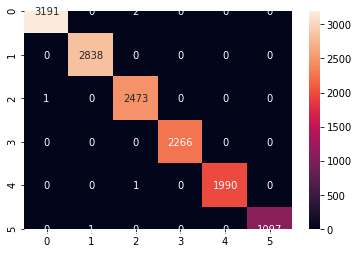

In [58]:
sns.heatmap(cm,fmt='d',annot=True)

In [59]:
print(classification_report(y_train, y_predict_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3193
           1       1.00      1.00      1.00      2838
           2       1.00      1.00      1.00      2474
           3       1.00      1.00      1.00      2266
           4       1.00      1.00      1.00      1991
           5       1.00      1.00      1.00      1098

    accuracy                           1.00     13860
   macro avg       1.00      1.00      1.00     13860
weighted avg       1.00      1.00      1.00     13860



In [60]:
cm=confusion_matrix(y_test,y_predict)

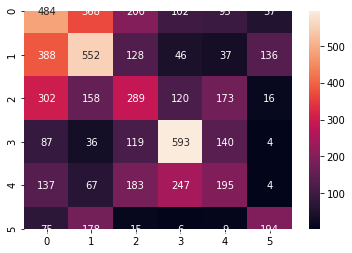

In [61]:
sns.heatmap(cm,fmt='d',annot=True)

In [62]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.33      0.37      0.35      1306
           1       0.41      0.43      0.42      1287
           2       0.31      0.27      0.29      1058
           3       0.53      0.61      0.57       979
           4       0.30      0.23      0.26       833
           5       0.47      0.41      0.44       477

    accuracy                           0.39      5940
   macro avg       0.39      0.39      0.39      5940
weighted avg       0.38      0.39      0.38      5940



In [63]:
# Grid Search
param_grid={
    'penalty':['l2'],
    'C':np.logspace(-4,4,20),
    'solver':['liblinear', 'newton-cg','sag', 'saga']
}

In [64]:
log_reg=LogisticRegression(random_state=0)

In [65]:
clf=GridSearchCV(log_reg, param_grid=param_grid, cv=10, verbose=True, n_jobs=-1)

In [66]:
best_clf=clf.fit(X_train, y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   53.5s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  1.9min finished


In [67]:
print(best_clf.best_params_)

{'C': 4.281332398719396, 'penalty': 'l2', 'solver': 'newton-cg'}


In [68]:
y_predict=best_clf.predict(X_test)

In [69]:
cm=confusion_matrix(y_test, y_predict)

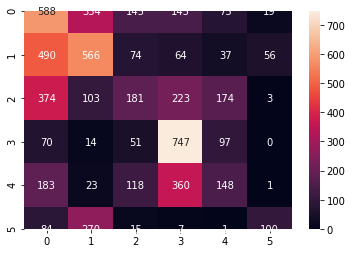

In [70]:
sns.heatmap(cm,annot=True,fmt='d')

In [71]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.33      0.45      0.38      1306
           1       0.43      0.44      0.44      1287
           2       0.31      0.17      0.22      1058
           3       0.48      0.76      0.59       979
           4       0.28      0.18      0.22       833
           5       0.56      0.21      0.30       477

    accuracy                           0.39      5940
   macro avg       0.40      0.37      0.36      5940
weighted avg       0.38      0.39      0.37      5940



# XGBoost

In [72]:
import xgboost as xgb

In [73]:
model = xgb.XGBClassifier()

In [74]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [75]:
y_predict=model.predict(X_test)

In [76]:
cm=confusion_matrix(y_test, y_predict)

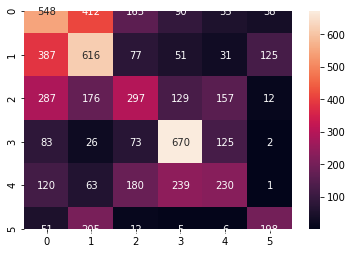

In [77]:
sns.heatmap(cm,annot=True,fmt='d')

In [78]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.37      0.42      0.39      1306
           1       0.41      0.48      0.44      1287
           2       0.37      0.28      0.32      1058
           3       0.57      0.68      0.62       979
           4       0.38      0.28      0.32       833
           5       0.53      0.42      0.46       477

    accuracy                           0.43      5940
   macro avg       0.44      0.43      0.43      5940
weighted avg       0.43      0.43      0.42      5940



# Naive Bayes

In [79]:
from sklearn.naive_bayes import GaussianNB

In [80]:
nb = GaussianNB()

In [81]:
nb.fit(X_train,y_train)

GaussianNB()

In [82]:
y_predict=nb.predict(X_test)

In [83]:
cm=confusion_matrix(y_test, y_predict)

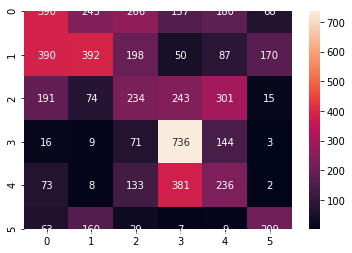

In [84]:
sns.heatmap(cm,annot=True,fmt='d')

In [85]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.35      0.30      0.32      1306
           1       0.44      0.30      0.36      1287
           2       0.25      0.22      0.24      1058
           3       0.47      0.75      0.58       979
           4       0.25      0.28      0.26       833
           5       0.45      0.44      0.44       477

    accuracy                           0.37      5940
   macro avg       0.37      0.38      0.37      5940
weighted avg       0.36      0.37      0.36      5940



In [86]:
SGDClf = linear_model.SGDClassifier(max_iter = 1000, tol=1e-3,penalty = "elasticnet")
SGDClf.fit(X_train, y_train)

SGDClassifier(penalty='elasticnet')

In [87]:
y_predict=SGDClf.predict(X_test)

In [88]:
cm=confusion_matrix(y_test, y_predict)

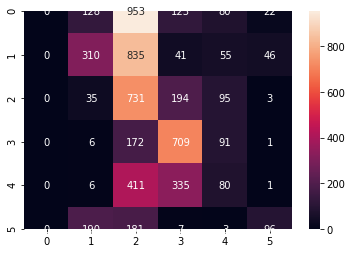

In [89]:
sns.heatmap(cm,annot=True,fmt='d')

In [90]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1306
           1       0.46      0.24      0.32      1287
           2       0.22      0.69      0.34      1058
           3       0.50      0.72      0.59       979
           4       0.20      0.10      0.13       833
           5       0.57      0.20      0.30       477

    accuracy                           0.32      5940
   macro avg       0.33      0.33      0.28      5940
weighted avg       0.30      0.32      0.27      5940



c:\users\hp\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [91]:
#y_predict=model.predict(test)

In [92]:
#y_predict.shape

In [93]:
#y_predict

In [94]:
#predict=pd.DataFrame(data=y_predict)

In [95]:
#predict.head()

In [96]:
#predict.replace(to_replace=[0],value='10to15',inplace=True)
#predict.replace(to_replace=[1],value='15to25',inplace=True)
#predict.replace(to_replace=[2],value='6to10',inplace=True)
#predict.replace(to_replace=[3],value='0to3',inplace=True)
#predict.replace(to_replace=[4],value='3to6',inplace=True)
#predict.replace(to_replace=[5],value='25to50',inplace=True)

In [97]:
#predict.head()

In [98]:
#predict.to_csv('solution.csv',index=False)